In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import atn.ATN as ATN
import tool.common as cm
import mnist_attak.train_cnn
import atn_train
sigmoid_norm = atn_train.sigmoid_norm
CNN_1 = mnist_attak.train_cnn.CNN_1
CNN_2 = mnist_attak.train_cnn.CNN_2
nn = torch.nn
_, __, x_test, y_test = cm.load_data('mnist')
del _
del __
import gc
gc.collect()

28

## File name convention:
Two different kinds of GATN (GATN_FC/GATN_CONV), two different kinds of CNN (CNN_1/CNN_2), ten differnet target, in total 40 models

for example, 'GatnFC_mnistCNN_1_target7' is GatnFC trained on MNIST of classifer type CNN_1 and target 7

to see the result, please follow instruction below:

#### 1. specify what mnist classifer you want to attack
change following code
```python
CNN_FILE_PATH = 'data/mnist_CNN_1_model_params.pkl' # if you attack CNN_2, change 1 to 2
cnn_mnist = CNN_1() # if you attack CNN_2, change 1 to 2
```
#### 2. specify the Gatn you used to attack
```python
ATN_FILE_PATH = 'data/GatnFC_mnistCNN_1_target8.parameter' 
# if you attack CNN_1, change CNN_1 to CNN_2
# change the target number to one of 0-9 you with to attack BOTH in the FILE_PATH and target
target = 8
# if you use GatnConv to attack, change 'GatnFC' to 'GatnConv' in FILE_PATH and use ATN.GATN_Conv
atn = ATN.GATN_FC()
```
#### 3. change idx below and start exploring
the idx should be a number in 0-9999, naming one of MNIST test set example

In [2]:
# loading 
CNN_FILE_PATH = 'data/mnist_CNN_1_model_params.pkl'
cnn_mnist = CNN_1()
cnn_mnist.load_state_dict(torch.load(CNN_FILE_PATH))

ATN_FILE_PATH = 'data/GatnConv_mnistCNN_1_target4.parameter'
atn = ATN.GATN_Conv()
atn.load_state_dict(torch.load(ATN_FILE_PATH))
target = 4

# calculating accuracy and target rate
x_test_grad = atn_train.cal_grad_target(x_test, cnn_mnist, target)
x_adv_test = atn(x_test, x_test_grad)
y_pred = cnn_mnist(x_adv_test)
acc, targetrate = atn_train.accuracy(y_pred, y_test, target)
print('|test accuracy:%.4f' % acc, '|target rate:%.4f' % targetrate)

|test accuracy:0.1462 |target rate:0.9367


In [3]:
idx = 668

### This is original image and original output class

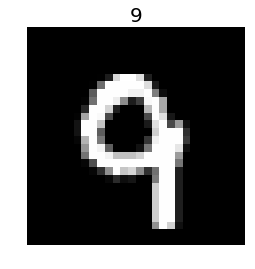

In [29]:
idx += 1
x_original = x_test[idx].reshape(1,1,28,28)

before_pro = cnn_mnist(x_original)
cm.imshow(x_original, torch.argmax(before_pro,dim=1).item())

### This is adversarial image and attacked output class

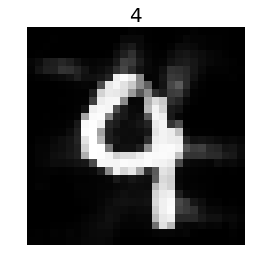

original probability tensor:  tensor([[ 6.1435e-05,  2.9391e-05,  8.2617e-06,  1.2810e-05,  2.4816e-04,
          4.7398e-05,  4.0662e-05,  3.9060e-04,  1.4927e-04,  9.9901e-01]])
adversarial probability tensor:  tensor([[ 0.0003,  0.0002,  0.0000,  0.0000,  0.9894,  0.0002,  0.0008,
          0.0008,  0.0004,  0.0078]])


In [30]:
x_grad = atn_train.cal_grad_target(x_original, cnn_mnist, target)
x_adv = atn(x_original, x_grad)
#x_adv = atn(x_original) 
x_adv_detach = x_adv.detach()


after_pro = cnn_mnist(x_adv)
cm.imshow(x_adv_detach,torch.argmax(after_pro,dim=1).item())
print("original probability tensor: ", before_pro)
print("adversarial probability tensor: ", after_pro )
#print("reranking function", atn_train.reranking(sigmoid_norm(cnn_mnist(x_original)),1, 11) )

### This show the perturbation on the image

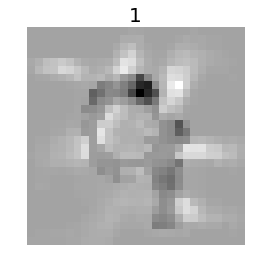

In [31]:
cm.imshow( x_adv_detach - x_original, 1)

## If you have time, you can help write a function that can plot many images at the same time...